# Unsupervised (Denetimsiz Öğrenme)

## Kütüphane Tanımlama

In [49]:
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.datasets import load_digits
from sklearn.manifold import Isomap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

## Dataset Kurulumu ve Ayarları

In [3]:
iris = sns.load_dataset('iris')

In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
X_iris = iris.drop('species', axis = 1)
X_iris.shape

(150, 4)

In [6]:
y_iris = iris['species']
y_iris.shape

(150,)

## Modelin Boyutunu Düşürerek Okunabilirliği Arttırma

In [9]:
model = PCA(n_components=2)

In [10]:
model.fit(X_iris)

PCA(n_components=2)

In [13]:
X_2D = model.transform(X_iris)

In [14]:
iris['PCA1'] = X_2D[:,0]
iris['PCA2'] = X_2D[:,1]

In [15]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755


C:\Users\Public\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


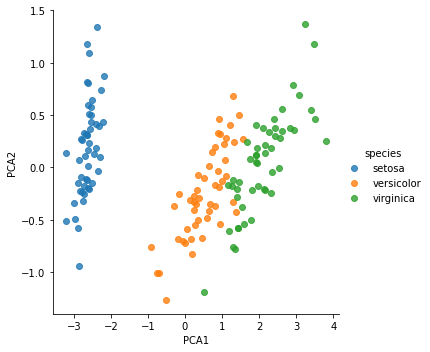

In [17]:
sns.lmplot('PCA1','PCA2',hue = 'species', data = iris, fit_reg = False)

## Kümeleme Algoritmasi (GaussianMixture)

In [19]:
model = GaussianMixture(n_components=3, covariance_type='full')

In [20]:
model.fit(X_iris)

C:\Users\Public\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


GaussianMixture(n_components=3)

In [21]:
y_gmm = model.predict(X_iris)

In [22]:
iris['kumeleme'] = y_gmm

In [23]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2,kumeleme
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397,1
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001,1
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949,1
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299,1
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755,1


C:\Users\Public\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


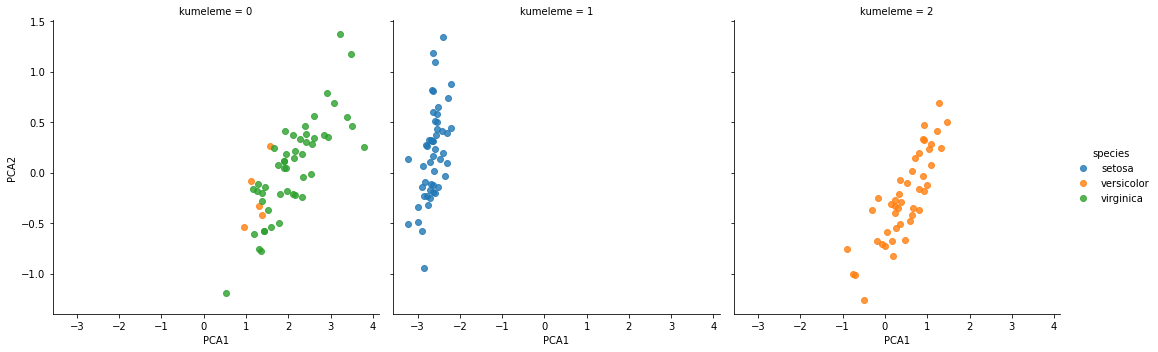

In [24]:
sns.lmplot('PCA1','PCA2',hue = 'species', data = iris,col = 'kumeleme', fit_reg = False)

In [26]:
digits = load_digits()
digits.images.shape

(1797, 8, 8)

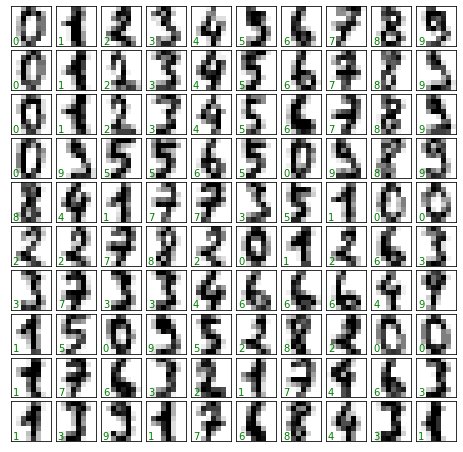

In [32]:
fig , axes = plt.subplots(10,10, figsize=(8,8), subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw = dict(hspace = 0.1, wspace = 0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap= 'binary', interpolation = 'nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),transform=ax.transAxes, color= 'green')

In [34]:
X = digits.data
y = digits.target
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


In [36]:
iso = Isomap(n_components=2)

In [38]:
iso.fit(X)

C:\Users\Public\anaconda3\lib\site-packages\sklearn\manifold\_isomap.py:328: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\Users\Public\anaconda3\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


Isomap()

In [39]:
data2 = iso.transform(X)
data2.shape

(1797, 2)

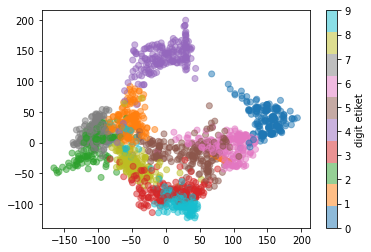

In [40]:
plt.scatter(data2[:,0],data2[:,1], c = digits.target, alpha=0.5,
           cmap = plt.cm.get_cmap('tab10',10))
plt.colorbar(label = 'digit etiket', ticks = range(10))

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [44]:
model = GaussianNB()

In [45]:
model.fit(X_train, y_train)

GaussianNB()

In [46]:
y_model = model.predict(X_test)

In [48]:
accuracy_score(y_test,y_model)

0.8333333333333334

In [50]:
mat = confusion_matrix(y_test, y_model)

Text(91.68, 0.5, 'Gercek Deger')

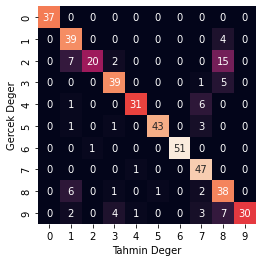

In [51]:
sns.heatmap(mat, square=True,annot= True,cbar = False)
plt.xlabel('Tahmin Deger')
plt.ylabel('Gercek Deger')